Titanic Survival Project



In [213]:
# Load general libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [214]:
# Load the Titanic training dataset from csv file
titanic = pd.read_csv("../Data/train.csv")

# Load the Titanic test dataset from csv file
titanic_test = pd.read_csv("../Data/test.csv")

Descriptive Statistics of Titanic dataset 

In [215]:
# Print the first five rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
# Print the shape of the data: 891 rows, 12 columns
titanic.shape

(891, 12)

In [217]:
# summary statistics for the numeric data types
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [218]:
# Find data type for each column and display
dtype_df = titanic.dtypes.reset_index()
dtype_df.columns = ['Col_Name','Col_Type']
dtype_df

,Col_Name,Col_Type
0,PassengerId,int64
1,Survived,int64
2,Pclass,int64
3,Name,object
4,Sex,object
5,Age,float64
6,SibSp,int64
7,Parch,int64
8,Ticket,object
9,Fare,float64


In [219]:
# Print the amount classified as survived and not survived
print(titanic.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


Data Visualizations

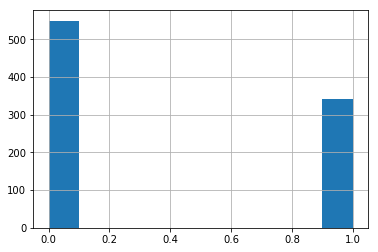

In [220]:
# Histogram of Survived
titanic['Survived'].hist()

Pclass
1    216
2    184
3    491
dtype: int64


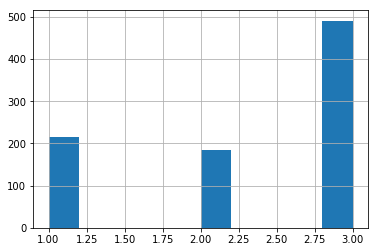

In [221]:
# Pclass
titanic['Pclass'].hist()
print(titanic.groupby('Pclass').size())

In [222]:
# Sex

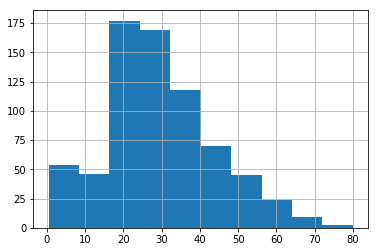

In [223]:
# Age 
titanic['Age'].hist()

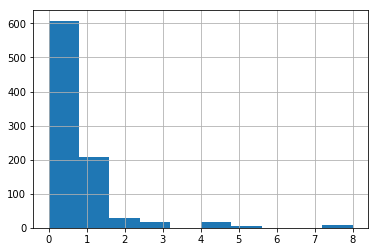

In [224]:
# SibSp
titanic['SibSp'].hist()

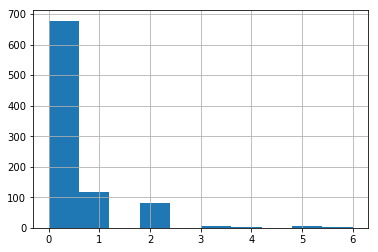

In [225]:
# Parch
titanic['Parch'].hist()

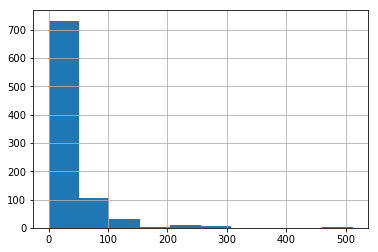

In [226]:
# Fare
titanic['Fare'].hist()
#print(titanic.groupby('Pclass').size())

In [227]:
# Embarked
print(titanic.groupby('Embarked').size())

Embarked
C    168
Q     77
S    644
dtype: int64


Missing Values
1) Age
   Create a new column by seperating out 'Title' from 'Name'
   Find the median age for each title and impute that value for passengers
2) Cabin
   Over 70% of values are missing.  I did not impute any values here
3) Embarked
   Only 2 values missing, so I replaced with the most common value, S.

In [228]:
# Find the number of missing values

# create a new dataframe to deal with missing values
missing_df = titanic.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Col_Name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df

,Col_Name,missing_count
5,Age,177
10,Cabin,687
11,Embarked,2


In [229]:
# create a new dataframe to deal with missing values
tmissing_df = titanic_test.isnull().sum(axis=0).reset_index()
tmissing_df.columns = ['Col_Name','missing_count']
tmissing_df = tmissing_df.loc[tmissing_df['missing_count']>0]
tmissing_df

,Col_Name,missing_count
4,Age,86
8,Fare,1
9,Cabin,327


In [230]:
# Function to extract the passengers title from the Name field
def extract_title(x):
    # Extract the passengers title from their Name field
    x = titanic['Name'].str.split(",",expand=True)
    x = x[1].str.split(".",expand=True)[0]
    # Remove all spaces from the title column
    x = x.str.replace(' ','')
    return x

# Add a title column to our train data frame
titanic['Title'] = extract_title(titanic)

# Add a title column to our train data frame
titanic_test['Title'] = extract_title(titanic_test)


In [231]:
# find mean age for each title
title_median = titanic.groupby('Title')['Age'].median()
title_median

Title
Capt           70.0
Col            58.0
Don            40.0
Dr             46.5
Jonkheer       38.0
Lady           48.0
Major          48.5
Master          3.5
Miss           21.0
Mlle           24.0
Mme            24.0
Mr             30.0
Mrs            35.0
Ms             28.0
Rev            46.5
Sir            49.0
theCountess    33.0
Name: Age, dtype: float64

In [232]:
# Replace any missing values of age with median age based on title
def replace_age(df, titles):
    for title in titles:
        df.loc[(df['Age'].isnull()) & (df['Title'] == title), 'Age'] = title_median[title]
        
train_titles = titanic.loc[titanic['Age'].isnull(),'Title'].unique()
replace_age(titanic,train_titles)

test_titles = titanic_test.loc[titanic_test['Age'].isnull(),'Title'].unique()
replace_age(titanic_test,test_titles)

In [233]:
titanic_test['Age'].isnull().sum()

0

In [234]:
# All missing age data has been replaced
print(titanic['Age'].isnull().sum())

0


In [235]:
# create a new dataframe
missing_df = titanic.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Col_Name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df

,Col_Name,missing_count
10,Cabin,687
11,Embarked,2


In [236]:
# Embarked
print(titanic.groupby('Embarked').size())

Embarked
C    168
Q     77
S    644
dtype: int64


In [237]:
# Embarked - only 2 values missing, so we will just replace with the most common value
titanic.loc[titanic['Embarked'].isnull(),'Embarked'] = 'S'

In [238]:
# One Fare is missing in test set
titanic_test.loc[titanic_test['Fare'].isnull(),'Fare'] = titanic_test['Fare'].mean()

In [239]:
# create a new dataframe
missing_df = titanic.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Col_Name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df

,Col_Name,missing_count
10,Cabin,687


Build the training set for the model

In [240]:
def drop_features(df):
    return df.drop(['Name',"Ticket","Cabin","Title"], axis=1)
    
# Drop Name, PassengerID, Ticket, Cabin, Title
titanic_train = drop_features(titanic)
titanic_test = drop_features(titanic_test)

In [241]:
#titanic_train_d = pd.get_dummies(titanic_train)
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [242]:
# I think i have a data type problem.  I think I'm assignign a string to a missing value instead of an int.

from sklearn import preprocessing

def encode_features(df_train, df_test):
    features = ['Sex','Embarked']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
titanic_train_e, titanic_test_e = encode_features(titanic_train, titanic_test)
titanic_test_e.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [243]:
# Find data type for each column and display
dtype_df = titanic_test.dtypes.reset_index()
dtype_df.columns = ['Col_Name','Col_Type']
dtype_df

,Col_Name,Col_Type
0,PassengerId,int64
1,Pclass,int64
2,Sex,int64
3,Age,float64
4,SibSp,int64
5,Parch,int64
6,Fare,float64
7,Embarked,int64


In [244]:
titanic_train_e.to_csv("../Data/titanic_train_2.csv",index=False)
titanic_test_e.to_csv("../Data/titanic_test_2.csv",index=False)
